In [1]:
import cupy as cp
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from system import System
from scipy.optimize import curve_fit
plt.style.use('default')

## Experimento 0

- Medio Dicotómico Aleatorio
- Resuelvo varios sistemas para diferentes valores de $p$.
- Estudio solo la velocidad

### Notas:

El sistema de ecuaciones adimensional a resolver es:

![](Img/SIR_diff.png)

- El valor de $p$ es la probabilidad de que $\lambda(x,y)=0$, mientras que $1-p$ corresponde a la probabilidad de que $\lambda(x,y) = \lambda_0$ 
- $\lambda$ es un grupo adimensional dado por $\lambda=1/R_0=\frac{\beta}{\gamma S_0}$
- $\lambda$ solo tiene efecto en la derivada de $I$, de hecho si $\lambda>1$ no hay solución en forma de onda.
- $1/\lambda = R_0$ es el número reprocutivo básico: "cantidad de sujetos infectados por un sujeto infectado en el período de infección".
- $\lambda$ puede entenderse como la cantidad de nuevos sujetos recuperados por nuevos sujetos infectados. 
- Transformación para la adimensionalización: ($r=\beta$ ; $\gamma = a$)

![](Img/Adim.png)


- IMPORTANTE: Hay una diferencia sustancial con lo del año pasado, si $\beta$ es función de la posición, notar que la adimensionalización anterior no vale. Hay que adimensionalizar de otra manera. Hacer $\lambda$ dependiente la posición es equivalente a hacer $\gamma$ dependiente de la posición con $\beta$ fijo.
Igual es interesante

In [5]:
s = System(N=1024)

p_vec = [p for p in np.linspace(0,.8,10)]
t_max = 50000

for p in tqdm(p_vec):
    s.set_plane_initial_conditions()
    s.set_dic_R0(R_0=5.,p=p)
    u_cm = np.array([])
    t = np.array([])
    while s.t_it <= t_max and s.u_cm() < s.N*.8:
        s.update()
        s.rigid_x()

        u_cm = np.append(u_cm,s.u_cm())
        t = np.append(t,s.t)

    np.save('data/exp_0/u_cm_p_'+str(p),u_cm)
    np.save('data/exp_0/t_p_'+str(p),t)


100%|██████████| 10/10 [00:28<00:00,  2.89s/it]


array(3.48278937)

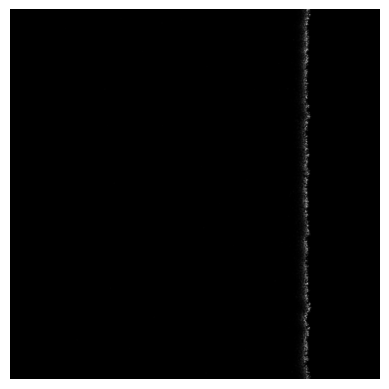

In [6]:
plt.imshow(cp.asnumpy(s.I),cmap='gray')
plt.axis('off')
s.u_sigma()

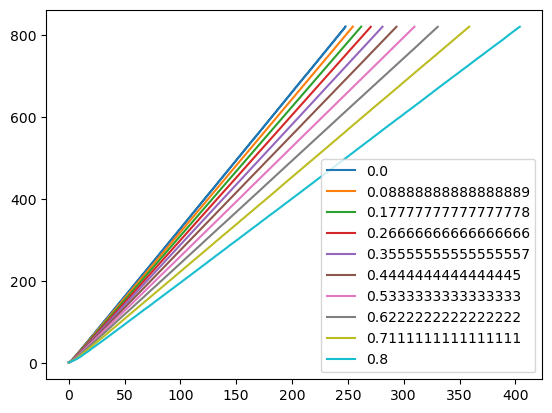

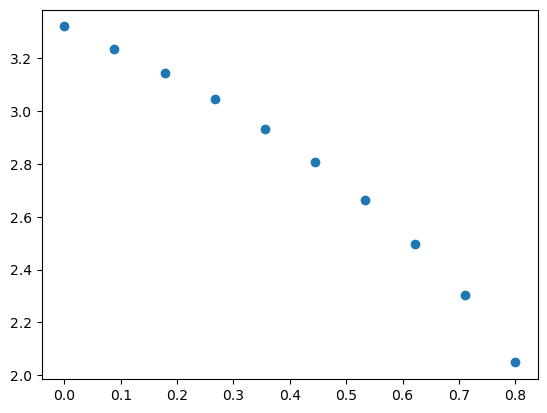

In [7]:
def lineal(x,a,b):
    return a*x+b

c = []
plt.figure()
for p in p_vec:
    t = np.load('data/exp_0/t_p_'+str(p)+'.npy')
    u_cm = np.load('data/exp_0/u_cm_p_'+str(p)+'.npy')
    c = np.append(c,curve_fit(lineal,t,u_cm)[0][0])
    plt.plot(t,u_cm,label=str(p))
plt.legend()

plt.figure()
plt.plot(p_vec,c,'o')    

In [2]:
lamb0, N, p = .2, 32, .5
lamb = cp.random.choice([0,lamb0],size=(N,N),p = [p,1-p])
#lamb = pf.dic_smoothing(lamb,10)

In [3]:
plt.style.use('default')

In [4]:
s = System(1024)
s.set_plane_initial_conditions()
s.set_dic_lambda(.2)
s.solve(tmax=1000)


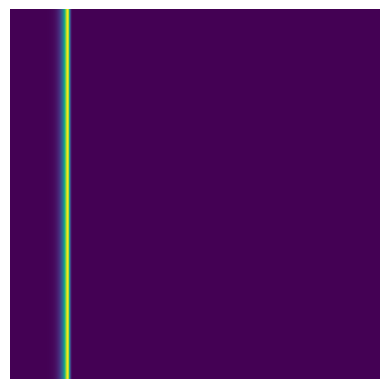

In [6]:
s.plot_I()

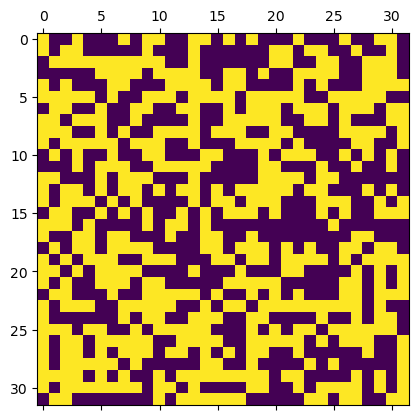

In [32]:
plt.matshow(cp.asnumpy(lamb))
plt.show()

[[106.6          4.18476034   3.36147082 ...   2.35070576   3.36147082
    4.18476034]
 [  2.96878732   1.7497183    2.70244051 ...   2.24943634   2.53735948
    0.97135713]
 [  6.01498341   4.20611395   2.84963876 ...   5.32563242   1.7811247
    0.58527228]
 ...
 [  2.73713512   1.51231657   6.37583989 ...   1.77017838   4.0003319
    2.52880325]
 [  6.01498341   0.58527228   1.7811247  ...   2.15320855   2.84963876
    4.20611395]
 [  2.96878732   0.97135713   2.53735948 ...   3.30285673   2.70244051
    1.7497183 ]]


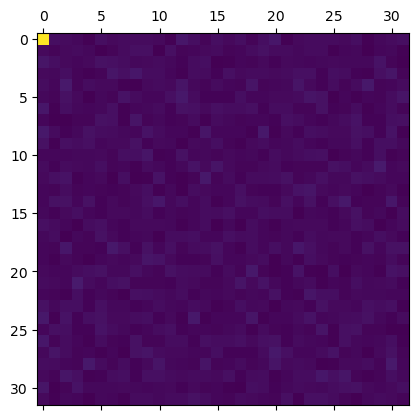

In [33]:
print(cp.asnumpy(abs(cp.fft.fft2(lamb))))
plt.matshow(cp.asnumpy(abs(cp.fft.fft2(lamb))))
plt.show()

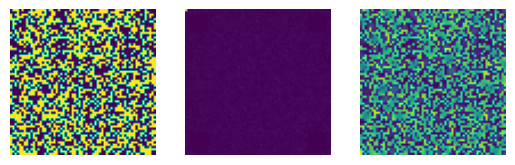

0.493896484375 0.5313866595006761


In [46]:
test = cp.random.choice([0,1],size=(64,64),p = [.5,.5])
fft_test = cp.fft.fft2(test)
k_min = 10
fft_test[2:k_min,2:k_min] = 0
fft_test[-k_min:-2,-k_min:-2] = 0
fft_test[2:k_min,-k_min:-2] = 0
fft_test[-k_min:-2,2:k_min] = 0

i_test = cp.fft.ifft2(fft_test)

plt.subplot(131)
plt.imshow(cp.asnumpy(test))
plt.axis('off')

plt.subplot(132)
plt.imshow(cp.asnumpy(cp.abs(fft_test)))
plt.axis('off')

plt.subplot(133)
plt.imshow(cp.asnumpy(cp.abs(i_test)))
plt.axis('off')

plt.show()

print(cp.mean(test),cp.mean(cp.abs(i_test)))

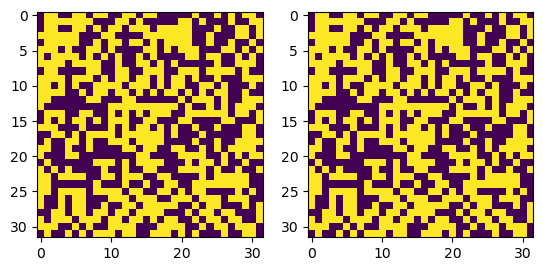

In [41]:
test = cp.random.choice([0,1],size=(32,32),p = [.5,.5])
fft_test = cp.fft.fft2(test)
test2 = cp.fft.ifft2(fft_test)

plt.subplot(121)
plt.imshow(cp.asnumpy(test))

plt.subplot(122)
plt.imshow(cp.asnumpy(cp.abs(test2)))